In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,precision_score,roc_auc_score,matthews_corrcoef,precision_recall_fscore_support,make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE
 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,StackingClassifier,VotingClassifier

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [3]:
df=pd.read_excel("C:/Users/saich/OneDrive/Desktop/Diabetes_Classification.xlsx")

In [4]:
df.drop(labels="Patient number",axis=1,inplace=True)

In [5]:
df.replace({'Gender':{"female":"F","male":"M"}},inplace=True)

In [6]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Cholesterol        50.000
Glucose            26.750
HDL Chol           21.000
Chol/HDL ratio      2.200
Age                26.000
Gender              1.000
Height              6.000
Weight             49.750
BMI                 8.175
Systolic BP        26.000
Diastolic BP       15.000
waist               8.000
hip                 7.000
Waist/hip ratio     0.100
dtype: float64


In [8]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
target=df["Diabetes"]
features=df.drop(columns="Diabetes",axis=1)

In [10]:
sm = SMOTE(random_state=42,sampling_strategy="minority") 
new_features, new_target = sm.fit_resample(features, target)

In [11]:
scaler = StandardScaler()
X_res=pd.DataFrame(scaler.fit_transform(new_features),columns=list(new_features.columns))
y_res=new_target

In [12]:
y_res.value_counts()

Diabetes       277
No diabetes    277
Name: Diabetes, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_res,
                                               y_res,
                                               test_size=0.35,
                                               random_state=42)

# Function to get scores(KFold cross validation)

In [14]:
def evaluate_model_accuracy(model, X, y):
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)
    return scores


def evaluate_model_recall_positive(model,X,y):
    scoring = {'recall' : make_scorer(recall_score,pos_label="Diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_recall"]

def evaluate_model_recall_negative(model,X,y):
    scoring = {'recall' : make_scorer(recall_score,pos_label="No diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_recall"]

def evaluate_model_roc_auc(model, X, y):
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=kfold, n_jobs=-1)
    return scores

def evaluate_model_matthews_corrcoef(model,X,y):
    score=matthews_corrcoef(y,model.predict(X))
    return score

def evaluate_model_precision(model,X,y):
    scoring = {'precision' : make_scorer(recall_score,pos_label="Diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_precision"]

def evaluate_model_f1score(model,X,y):
    scoring = {'f1' : make_scorer(recall_score,pos_label="Diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_f1"]


# Logistic Regression

In [15]:
LR=LogisticRegression(C=11.288378916846883,penalty="l2",solver= 'liblinear')

LR.fit(X_train1,Y_train1)

LogisticRegression(C=11.288378916846883, solver='liblinear')

In [16]:
print(classification_report(Y_test1,LR.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.87      0.80      0.83        96
 No diabetes       0.82      0.88      0.85        98

    accuracy                           0.84       194
   macro avg       0.84      0.84      0.84       194
weighted avg       0.84      0.84      0.84       194



In [17]:
cv = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
scoring = {'recall' : make_scorer(recall_score,pos_label="Diabetes") }

In [18]:
# for recall
results1 =cross_validate(estimator=LR,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring=scoring)
# for accuracy
accuracy1 = model_selection.cross_val_score(LR, X_train1,Y_train1, scoring='accuracy', cv=cv, n_jobs=-1)

In [19]:
print("Accuracy",np.mean(accuracy1))
print("recall score is :",np.mean(results1["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(LR, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results1["score_time"]))
print("fit time is :",np.mean(results1["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=LR,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))

Accuracy 0.8166666666666668
recall score is : 0.8533626873642353
roc-auc score is 0.9041860916860915
score time is : 0.0026960372924804688
fit time is : 0.003786444664001465
recall score for No diabetes is : 0.7906561881045324


# Grid Search

In [20]:
# # # # param_grid = [
# # # #     {
# # # #      'penalty' : ['l1', 'l2'],
# # # #     'C' : np.logspace(-4, 4, 20),
# # # #     'solver' : ['liblinear']}
# # # # ]

# # # param_grid = [
# # #     {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
# # # ]

# param_grid = dict(n_neighbors=list(range(10, 31)))

# param_grid = dict(n_estimators=[i for i in [10,20,30,40,50,60,70,80,90,100]])
# # # grid = RandomizedSearchCV(knn, param_distributions = param_grid, cv = 10,n_jobs=-1)
# grid=GridSearchCV(etc,param_grid,cv=10,n_jobs=-1)

In [21]:
# grid.fit(X_train1,Y_train1)

In [22]:
# grid.best_params_

# Decsison Trees

In [23]:
classifier1=DecisionTreeClassifier(criterion="entropy",max_depth=6)

In [24]:
classifier1.fit(X_train1,Y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [25]:
print(classification_report(Y_test1,classifier1.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.92      0.95      0.93        96
 No diabetes       0.95      0.92      0.93        98

    accuracy                           0.93       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.93      0.93      0.93       194



In [26]:
results2 =cross_validate(estimator=classifier1,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy2 = model_selection.cross_val_score(classifier1, X_train1,Y_train1, scoring='accuracy', cv=cv, n_jobs=-1)

In [27]:
print("Accuracy",np.mean(accuracy2))
print("recall score is :",np.mean(results1["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(classifier1, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results1["score_time"]))
print("fit time is :",np.mean(results1["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=classifier1,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))

Accuracy 0.925
recall score is : 0.8533626873642353
roc-auc score is 0.9091326451326452
score time is : 0.0026960372924804688
fit time is : 0.003786444664001465
recall score for No diabetes is : 0.8699567099567099


# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=11,n_jobs=-1)  
knn.fit(X_train1, Y_train1) 

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [29]:
print(classification_report(Y_test1,knn.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.81      1.00      0.89        96
 No diabetes       1.00      0.77      0.87        98

    accuracy                           0.88       194
   macro avg       0.90      0.88      0.88       194
weighted avg       0.90      0.88      0.88       194



In [30]:
results3 =cross_validate(estimator=knn,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy3 = model_selection.cross_val_score(knn, X_train1,Y_train1, scoring='accuracy', cv=cv, n_jobs=-1)

In [31]:
print("Accuracy",np.mean(accuracy3))
print("recall score for Diabetes is :",np.mean(results3["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(knn, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results3["score_time"]))
print("fit time is :",np.mean(results3["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=knn,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))

Accuracy 0.8638888888888889
recall score for Diabetes is : 1.0
roc-auc score is 0.9344652014652015
score time is : 0.018159151077270508
fit time is : 0.0035542011260986327
recall score for No diabetes is : 0.7307304386285407


# Naive bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train1, Y_train1)

GaussianNB()

In [33]:
print(classification_report(Y_test1,nb.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.87      0.82      0.84        96
 No diabetes       0.83      0.88      0.86        98

    accuracy                           0.85       194
   macro avg       0.85      0.85      0.85       194
weighted avg       0.85      0.85      0.85       194



In [34]:
results4 =cross_validate(estimator=nb,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy4 = model_selection.cross_val_score(nb, X_train1,Y_train1, scoring='accuracy', cv=cv, n_jobs=-1)

In [35]:
print("Accuracy",np.mean(accuracy4))
print("recall score is :",np.mean(results4["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(nb, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results4["score_time"]))
print("fit time is :",np.mean(results4["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=nb,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))

Accuracy 0.8416666666666668
recall score is : 0.8470257889685137
roc-auc score is 0.9185032745032744
score time is : 0.002451586723327637
fit time is : 0.0024391889572143556
recall score for No diabetes is : 0.8493380230880231


# SVM

In [36]:
svm = SVC(kernel='rbf',probability=True)
svm.fit(X_train1, Y_train1)

SVC(probability=True)

In [37]:
print(classification_report(Y_test1,svm.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.92      1.00      0.96        96
 No diabetes       1.00      0.92      0.96        98

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194



In [38]:
results5 =cross_validate(estimator=svm,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy5 = model_selection.cross_val_score(svm, X_train1,Y_train1, scoring='accuracy', cv=cv, n_jobs=-1)

In [39]:
print("Accuracy",np.mean(accuracy5))
print("recall score is :",np.mean(results5["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(svm, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results5["score_time"]))
print("fit time is :",np.mean(results5["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=svm,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))

Accuracy 0.9666666666666666
recall score is : 0.9941176470588236
roc-auc score is 0.9764568764568764
score time is : 0.003099203109741211
fit time is : 0.01884315013885498
recall score for No diabetes is : 0.9385977651930337


# Random Forests

In [40]:
rf=RandomForestClassifier()
rf.fit(X_train1, Y_train1)

RandomForestClassifier()

In [41]:
print(classification_report(Y_test1,rf.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.97      1.00      0.98        96
 No diabetes       1.00      0.97      0.98        98

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.99      0.98      0.98       194



In [42]:
results6 =cross_validate(estimator=rf,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy6 = model_selection.cross_val_score(rf, X_train1,Y_train1, scoring='accuracy', cv=cv, n_jobs=-1)

In [43]:
print("Accuracy",np.mean(accuracy6))
print("recall score is :",np.mean(results6["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(rf, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results6["score_time"]))
print("fit time is :",np.mean(results6["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=rf,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))

Accuracy 0.9833333333333332
recall score is : 1.0
roc-auc score is 0.9906898656898658
score time is : 0.012154245376586914
fit time is : 0.14348530769348145
recall score for No diabetes is : 0.9693181818181819


# Ensembel

In [44]:
model1= VotingClassifier(estimators=[ ('dt', classifier1),('knn',knn),('svm',svm),('nb',nb),('LR',LR)], voting='soft')
model1.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=6)),
                             ('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=11)),
                             ('svm', SVC(probability=True)),
                             ('nb', GaussianNB()),
                             ('LR',
                              LogisticRegression(C=11.288378916846883,
                                                 solver='liblinear'))],
                 voting='soft')

In [45]:
print(classification_report(Y_test1,model1.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.94      1.00      0.97        96
 No diabetes       1.00      0.94      0.97        98

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194



In [46]:
results =cross_validate(estimator=model1,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring=scoring)
accuracy = model_selection.cross_val_score(LR, X_train1,Y_train1, scoring='accuracy', cv=cv, n_jobs=-1)

In [47]:
print("Accuracy",np.mean(accuracy))
print("recall score is :",np.mean(results["test_recall"]))
print("score time is :",np.mean(results["score_time"]))
print("fit time is :",np.mean(results["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=model1,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))

Accuracy 0.8166666666666668
recall score is : 0.985909090909091
score time is : 0.024119472503662108
fit time is : 0.03190832138061524
recall score for No diabetes is : 0.904661429789307


# Ensemble of logistic regression classifiers.

In [48]:
logbagClf = BaggingClassifier(LR, n_estimators = 15,random_state=8)
logbagClf.fit(X_train1, Y_train1)

BaggingClassifier(base_estimator=LogisticRegression(C=11.288378916846883,
                                                    solver='liblinear'),
                  n_estimators=15, random_state=8)

In [49]:
print(classification_report(Y_test1,logbagClf.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.86      0.82      0.84        96
 No diabetes       0.83      0.87      0.85        98

    accuracy                           0.85       194
   macro avg       0.85      0.85      0.85       194
weighted avg       0.85      0.85      0.85       194



In [50]:
print('Accuracy: %.3f ' % (np.mean(model_selection.cross_val_score(logbagClf, X_train1,Y_train1, scoring='accuracy', cv=cv, n_jobs=-1))*100))

Accuracy: 81.944 


In [51]:
print("recall score is :",np.mean(cross_validate(estimator=LR,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring=scoring)["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(logbagClf, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=logbagClf,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))


recall score is : 0.8533626873642353
roc-auc score is 0.8981476856476857
recall score for No diabetes is : 0.7957052077123756


# Gradient boost

In [52]:
Gboost= GradientBoostingClassifier(learning_rate=0.9,random_state=42,n_estimators=250)
Gboost.fit(X_train1, Y_train1)

GradientBoostingClassifier(learning_rate=0.9, n_estimators=250, random_state=42)

In [53]:
def get_models():
    models = dict()
    n_trees = [10,30, 50, 100,250, 500, 1000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models

In [54]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f ' % (name, np.mean(scores)))

>10 0.868 
>30 0.968 
>50 0.991 
>100 0.991 
>250 0.982 
>500 0.973 
>1000 0.981 


# Adaboost

In [55]:
Adaboost = AdaBoostClassifier(random_state=42,n_estimators=1000)
Adaboost.fit(X_train1, Y_train1)

AdaBoostClassifier(n_estimators=1000, random_state=42)

In [56]:
def get_models():
    models = dict()
    n_trees = [10, 50, 100,250, 500,700, 1000]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

In [57]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f ' % (name, np.mean(scores)))

>10 0.902 
>50 0.912 
>100 0.921 
>250 0.958 
>500 0.962 
>700 0.962 
>1000 0.967 


In [58]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(LR,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(LR,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(LR,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(LR,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(LR,X_test1,Y_test1))
print("Precision is: ",np.mean(evaluate_model_precision(LR,X_test1,Y_test1)))

accuracy is:  0.8505263157894737
diabetes recall is:  0.8851839826839827
no diabetes recall is:  0.8319597069597069
roc_auc is:  0.9041860916860915
matthews_corrcoef is:  0.681921407946427
Precision is:  0.8851839826839827


# Gboost and rf ensemble

In [59]:
model2= VotingClassifier(estimators=[ ('Gboost', Gboost),('rf',rf)], voting='soft')
model2.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('Gboost',
                              GradientBoostingClassifier(learning_rate=0.9,
                                                         n_estimators=250,
                                                         random_state=42)),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [60]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(model2,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(model2,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(model2,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(model2,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(model2,X_test1,Y_test1))
print("Precision is: ",np.mean(evaluate_model_precision(model2,X_test1,Y_test1)))

accuracy is:  0.9531578947368422
diabetes recall is:  0.990909090909091
no diabetes recall is:  0.9080280830280831
roc_auc is:  0.9977994227994227
matthews_corrcoef is:  0.9497370184014335
Precision is:  0.990909090909091


# ExtraTreesClassifier

In [61]:
etc = ExtraTreesClassifier(n_estimators=50,random_state=42)
etc.fit(X_train1,Y_train1)

ExtraTreesClassifier(n_estimators=50, random_state=42)

In [62]:
def get_models():
    models = dict()
    n_trees = [10,30, 50, 100,250, 500,700, 1000]
    for n in n_trees:
        models[str(n)] = ExtraTreesClassifier(n_estimators=n)
    return models

In [63]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f ' % (name, np.mean(scores)))

>10 0.959 
>30 0.955 
>50 0.973 
>100 0.973 
>250 0.973 
>500 0.963 
>700 0.973 
>1000 0.973 


# Confusion Matrix

In [64]:
def conf_matrix(y_true,x_true,model):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_true, model.predict(x_true)), annot=True)
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Diabetes', 'No Diabetes']); ax.yaxis.set_ticklabels(['Diabetes', 'No Diabetes']);
    return ax

# Testing scores

In [65]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(etc,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)))
print("matthews_corrcoef is: ",evaluate_model_matthews_corrcoef(etc,X_test1,Y_test1))
print("Precision is: ",np.mean(evaluate_model_precision(etc,X_test1,Y_test1)))

accuracy is:  0.9589473684210527
diabetes recall is:  0.9627272727272727
no diabetes recall is:  0.961996336996337
roc_auc is:  0.9969696969696968
matthews_corrcoef is:  0.989743318610787
Precision is:  0.9627272727272727


# showing Confusion matrix

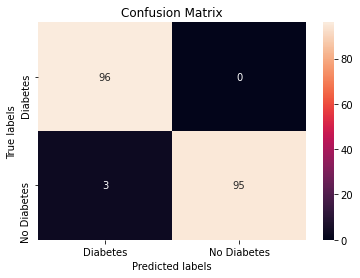

In [66]:
conf_matrix(Y_test1,X_test1,rf)
plt.show()

# plotting roc-auc curve

In [67]:
import sklearn.metrics as metrics
def roc_auc_curve(model,x,y):
    probs = model.predict_proba(x)
    preds = probs[:,0]
    fpr, tpr, threshold = metrics.roc_curve(y, preds,pos_label="Diabetes")
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC =%0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()



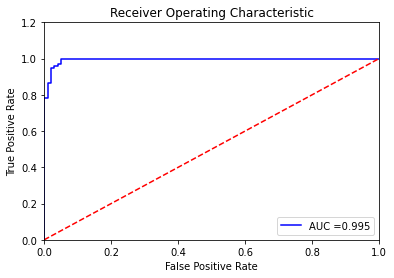

In [68]:
roc_auc_curve(model1,X_test1,Y_test1)

# All Scores

In [69]:
scores_df=pd.DataFrame()

LR_scores={'accuracy': [0.8868421052631579],
 'recall_positive': [0.9058658008658009],
 'recall_negative': [0.8478021978021978],
 'roc_auc': [0.9233404928404928],
 'precision': [0.9058658008658009]}

scores_df=pd.DataFrame(LR_scores,index=["LR"])

scores_df.loc["knn"] = [np.mean(evaluate_model_accuracy(knn,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_recall_negative(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_roc_auc(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(knn,X_test1,Y_test1))]


scores_df.loc["classifier1"] = [np.mean(evaluate_model_accuracy(classifier1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(classifier1,X_test1,Y_test1)),
                       np.mean(evaluate_model_recall_negative(classifier1,X_test1,Y_test1)),
                       np.mean(evaluate_model_roc_auc(classifier1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(classifier1,X_test1,Y_test1))]

scores_df.loc["svm"] = [np.mean(evaluate_model_accuracy(svm,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_recall_negative(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_roc_auc(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(svm,X_test1,Y_test1))]

scores_df.loc["nb"] = [np.mean(evaluate_model_accuracy(nb,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(nb,X_test1,Y_test1)),
                       np.mean(evaluate_model_recall_negative(nb,X_test1,Y_test1)),
                       np.mean(evaluate_model_roc_auc(nb,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(nb,X_test1,Y_test1))]

scores_df.loc["rf"] = [np.mean(evaluate_model_accuracy(rf,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(rf,X_test1,Y_test1)),
                       np.mean(evaluate_model_recall_negative(rf,X_test1,Y_test1)),
                       np.mean(evaluate_model_roc_auc(rf,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(rf,X_test1,Y_test1))]

scores_df.loc["Gboost"] = [np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_recall_negative(Gboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Gboost,X_test1,Y_test1))]

scores_df.loc["model"] = [np.mean(evaluate_model_accuracy(model1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_recall_negative(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_roc_auc(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model1,X_test1,Y_test1))]

scores_df.loc["Adaboost"] = [np.mean(evaluate_model_accuracy(Adaboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Adaboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_recall_negative(Adaboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_roc_auc(Adaboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Adaboost,X_test1,Y_test1))]

scores_df.loc["etc"] = [np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_recall_negative(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(etc,X_test1,Y_test1))]


In [70]:
scores_df["total_scores"] = scores_df.sum(axis=1)

scores_df

,accuracy,recall_positive,recall_negative,roc_auc,precision,total_scores
LR,0.886842,0.905866,0.847802,0.923340,0.905866,4.469716
knn,0.835000,0.946818,0.731990,0.934465,0.946818,4.395091
classifier1,0.928421,0.949199,0.878126,0.913638,0.960714,4.630098
svm,0.886579,0.891851,0.890904,0.976457,0.891851,4.537641
nb,0.849737,0.828279,0.872802,0.918503,0.828279,4.297601
rf,0.953684,0.973485,0.937241,0.996012,0.971818,4.832240
Gboost,0.953158,0.990909,0.908028,0.992477,0.990909,4.835481
model,0.886579,0.881732,0.906929,0.962993,0.900823,4.539055
Adaboost,0.937895,0.966623,0.900336,0.974792,0.966623,4.746269
etc,0.958947,0.962727,0.961996,0.996970,0.962727,4.843368


In [71]:
scores_df.sort_values(by="recall_positive",ascending=False)

,accuracy,recall_positive,recall_negative,roc_auc,precision,total_scores
Gboost,0.953158,0.990909,0.908028,0.992477,0.990909,4.835481
rf,0.953684,0.973485,0.937241,0.996012,0.971818,4.832240
Adaboost,0.937895,0.966623,0.900336,0.974792,0.966623,4.746269
etc,0.958947,0.962727,0.961996,0.996970,0.962727,4.843368
classifier1,0.928421,0.949199,0.878126,0.913638,0.960714,4.630098
knn,0.835000,0.946818,0.731990,0.934465,0.946818,4.395091
LR,0.886842,0.905866,0.847802,0.923340,0.905866,4.469716
svm,0.886579,0.891851,0.890904,0.976457,0.891851,4.537641
model,0.886579,0.881732,0.906929,0.962993,0.900823,4.539055
nb,0.849737,0.828279,0.872802,0.918503,0.828279,4.297601


# Ensemble of Gboost,rf,Adaboost

In [72]:
model2=VotingClassifier(estimators=[ ('Adaboost', Adaboost),('Gboost',Gboost),('rf',rf)], voting='soft')
model2.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('Adaboost',
                              AdaBoostClassifier(n_estimators=1000,
                                                 random_state=42)),
                             ('Gboost',
                              GradientBoostingClassifier(learning_rate=0.9,
                                                         n_estimators=250,
                                                         random_state=42)),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

# Ensemble of rf,Gboost,etc

In [73]:
model3=VotingClassifier(estimators=[ ('etc', etc),('Gboost',Gboost),('rf',rf)], voting='soft')
model3.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42)),
                             ('Gboost',
                              GradientBoostingClassifier(learning_rate=0.9,
                                                         n_estimators=250,
                                                         random_state=42)),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

# Ensemble of Adaboost,Gboost,etc

In [80]:
model4=VotingClassifier(estimators=[ ('etc', etc),('Gboost',Gboost),('Adaboost',Adaboost)], voting='soft')
model4.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42)),
                             ('Gboost',
                              GradientBoostingClassifier(learning_rate=0.9,
                                                         n_estimators=250,
                                                         random_state=42)),
                             ('Adaboost',
                              AdaBoostClassifier(n_estimators=1000,
                                                 random_state=42))],
                 voting='soft')

# Ensemble of rf,Gboost

In [84]:
model5=VotingClassifier(estimators=[ ('rf', rf),('Gboost',Gboost)], voting='soft')
model5.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('Gboost',
                              GradientBoostingClassifier(learning_rate=0.9,
                                                         n_estimators=250,
                                                         random_state=42))],
                 voting='soft')

# Individual Scores

In [74]:
individual_scores=pd.DataFrame()

LR_scores={'accuracy': [0.8868421052631579],
 'recall_positive': [0.9058658008658009],

 'roc_auc': [0.9233404928404928],
 'precision': [0.9058658008658009],
 "f1_score":[0.9058658008658009]}

individual_scores=pd.DataFrame(LR_scores,index=["LR"])

individual_scores.loc["knn"] = [np.mean(evaluate_model_accuracy(knn,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(knn,X_test1,Y_test1)),
               
                       np.mean(evaluate_model_roc_auc(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(knn,X_test1,Y_test1))]


individual_scores.loc["classifier1"] = [np.mean(evaluate_model_accuracy(classifier1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(classifier1,X_test1,Y_test1)),
                 
                       np.mean(evaluate_model_roc_auc(classifier1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(classifier1,X_test1,Y_test1)),
                               np.mean(evaluate_model_f1score(classifier1,X_test1,Y_test1))]

individual_scores.loc["svm"] = [np.mean(evaluate_model_accuracy(svm,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(svm,X_test1,Y_test1)),
              
                       np.mean(evaluate_model_roc_auc(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(svm,X_test1,Y_test1))]

individual_scores.loc["nb"] = [np.mean(evaluate_model_accuracy(nb,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(nb,X_test1,Y_test1)),
                  
                       np.mean(evaluate_model_roc_auc(nb,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(nb,X_test1,Y_test1)),
                      np.mean(evaluate_model_f1score(nb,X_test1,Y_test1))]

# Ensemble Models Scores

In [75]:
Ensemble_scores=pd.DataFrame()

rf_scores={'accuracy': [0.9642105263157894],
 'recall_positive': [0.9818181818181818],

 'roc_auc': [0.9944971694971695],
 'precision': [0.9584415584415584],
 "f1_score":[0.9825757575757577]}

Ensemble_scores=pd.DataFrame(rf_scores,index=["rf"])


Ensemble_scores.loc["Gboost"] = [np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)),
              
                       np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Gboost,X_test1,Y_test1)),
                          np.mean(evaluate_model_f1score(Gboost,X_test1,Y_test1))]

Ensemble_scores.loc["Adaboost"] = [np.mean(evaluate_model_accuracy(Adaboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Adaboost,X_test1,Y_test1)),
                  
                       np.mean(evaluate_model_roc_auc(Adaboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Adaboost,X_test1,Y_test1)),
                            np.mean(evaluate_model_f1score(Adaboost,X_test1,Y_test1))]

Ensemble_scores.loc["etc"] = [np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)),
                     
                       np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(etc,X_test1,Y_test1))]

# Custom Ensemble Models

In [85]:
custom_ensemble_scores=pd.DataFrame()

model1_scores={'accuracy': [0.8713157894736842],
 'recall_positive': [0.8966558441558442],

 'roc_auc': [0.9564897324897326],
 'precision': [0.8692316017316017],
 "f1_score":[  0.8883225108225108]}

custom_ensemble_scores=pd.DataFrame(model1_scores,index=["model1"])


custom_ensemble_scores.loc["model2"] = [np.mean(evaluate_model_accuracy(model2,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model2,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model2,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model2,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model2,X_test1,Y_test1))]

custom_ensemble_scores.loc["model3"]=[np.mean(evaluate_model_accuracy(model3,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model3,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model3,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model3,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model3,X_test1,Y_test1))]

custom_ensemble_scores.loc["model4"]=[np.mean(evaluate_model_accuracy(model4,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model4,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model4,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model4,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model4,X_test1,Y_test1))]

custom_ensemble_scores.loc["model5"]=[np.mean(evaluate_model_accuracy(model5,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model5,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model5,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model5,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model5,X_test1,Y_test1))]


custom_ensemble_scores.loc["model1"] = [np.mean(evaluate_model_accuracy(model1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model1,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model1,X_test1,Y_test1))]

In [77]:
individual_scores

,accuracy,recall_positive,roc_auc,precision,f1_score
LR,0.886842,0.905866,0.923340,0.905866,0.905866
knn,0.835000,0.946818,0.934465,0.946818,0.946818
classifier1,0.911842,0.977381,0.924682,0.933442,0.949199
svm,0.886579,0.891851,0.976457,0.891851,0.891851
nb,0.849737,0.828279,0.918503,0.828279,0.828279


In [78]:
Ensemble_scores

,accuracy,recall_positive,roc_auc,precision,f1_score
rf,0.964211,0.981818,0.994497,0.958442,0.982576
Gboost,0.953158,0.990909,0.992477,0.990909,0.990909
Adaboost,0.937895,0.966623,0.974792,0.966623,0.966623
etc,0.958947,0.962727,0.996970,0.962727,0.962727


In [86]:
custom_ensemble_scores

,accuracy,recall_positive,roc_auc,precision,f1_score
model1,0.891842,0.890823,0.965193,0.891732,0.900823
model2,0.953158,0.990909,0.996698,0.990909,0.990909
model3,0.953158,0.990909,0.996970,0.990909,0.990909
model4,0.953158,0.990909,0.997980,0.990909,0.990909
model5,0.953158,0.990909,0.995688,0.990909,0.990909
